In [1]:
import pandas as pd
import glob
import os
import datetime
import pprint
pp = pprint.PrettyPrinter(indent=4)


In [2]:
sensorFolder = 'spl-deploy-rc3flr'

## Data Pre-Processing

In [3]:
#checking files in folder -- this notebook is in the same directory

"""
optional

"""
files = os.listdir('./'+sensorFolder)
pp.pprint(files)

[   '2022-06-09.csv',
    '2022-06-08.csv',
    '.DS_Store',
    '2022-05-29.csv',
    '2022-05-28.csv',
    '2022-05-26.csv',
    '2022-05-27.csv',
    '2022-05-25.csv',
    '2022-05-31.csv',
    '2022-05-19.csv',
    '2022-05-18.csv',
    '2022-05-30.csv',
    '2022-05-24.csv',
    '2022-05-20.csv',
    '2022-05-21.csv',
    '2022-05-23.csv',
    '2022-05-22.csv',
    '.ipynb_checkpoints',
    '2022-06-01.csv',
    '2022-06-03.csv',
    '2022-06-02.csv',
    '2022-06-12.csv',
    '2022-06-06.csv',
    '2022-06-07.csv',
    '2022-06-13.csv',
    '2022-06-05.csv',
    '2022-06-11.csv',
    '2022-06-10.csv',
    '2022-06-04.csv']


In [4]:
#selecting all the csv files
files = os.path.join(sensorFolder,"2022*.csv")

# list of merged files returned
files = glob.glob(files)

#sorting files by date
files.sort()
pp.pprint(files)

#checking a single file
print(files[0])

[   'spl-deploy-rc3flr/2022-05-18.csv',
    'spl-deploy-rc3flr/2022-05-19.csv',
    'spl-deploy-rc3flr/2022-05-20.csv',
    'spl-deploy-rc3flr/2022-05-21.csv',
    'spl-deploy-rc3flr/2022-05-22.csv',
    'spl-deploy-rc3flr/2022-05-23.csv',
    'spl-deploy-rc3flr/2022-05-24.csv',
    'spl-deploy-rc3flr/2022-05-25.csv',
    'spl-deploy-rc3flr/2022-05-26.csv',
    'spl-deploy-rc3flr/2022-05-27.csv',
    'spl-deploy-rc3flr/2022-05-28.csv',
    'spl-deploy-rc3flr/2022-05-29.csv',
    'spl-deploy-rc3flr/2022-05-30.csv',
    'spl-deploy-rc3flr/2022-05-31.csv',
    'spl-deploy-rc3flr/2022-06-01.csv',
    'spl-deploy-rc3flr/2022-06-02.csv',
    'spl-deploy-rc3flr/2022-06-03.csv',
    'spl-deploy-rc3flr/2022-06-04.csv',
    'spl-deploy-rc3flr/2022-06-05.csv',
    'spl-deploy-rc3flr/2022-06-06.csv',
    'spl-deploy-rc3flr/2022-06-07.csv',
    'spl-deploy-rc3flr/2022-06-08.csv',
    'spl-deploy-rc3flr/2022-06-09.csv',
    'spl-deploy-rc3flr/2022-06-10.csv',
    'spl-deploy-rc3flr/2022-06-11.csv',


In [5]:
#getting total length of rows merged csv SHOULD be
"""
optional

"""
c = 0
for f in files:
    print(f)
    results = pd.read_csv(f)
    c+= len(results)
print(c)

spl-deploy-rc3flr/2022-05-18.csv
spl-deploy-rc3flr/2022-05-19.csv
spl-deploy-rc3flr/2022-05-20.csv
spl-deploy-rc3flr/2022-05-21.csv
spl-deploy-rc3flr/2022-05-22.csv
spl-deploy-rc3flr/2022-05-23.csv
spl-deploy-rc3flr/2022-05-24.csv
spl-deploy-rc3flr/2022-05-25.csv
spl-deploy-rc3flr/2022-05-26.csv
spl-deploy-rc3flr/2022-05-27.csv
spl-deploy-rc3flr/2022-05-28.csv
spl-deploy-rc3flr/2022-05-29.csv
spl-deploy-rc3flr/2022-05-30.csv
spl-deploy-rc3flr/2022-05-31.csv
spl-deploy-rc3flr/2022-06-01.csv
spl-deploy-rc3flr/2022-06-02.csv
spl-deploy-rc3flr/2022-06-03.csv
spl-deploy-rc3flr/2022-06-04.csv
spl-deploy-rc3flr/2022-06-05.csv
spl-deploy-rc3flr/2022-06-06.csv
spl-deploy-rc3flr/2022-06-07.csv
spl-deploy-rc3flr/2022-06-08.csv
spl-deploy-rc3flr/2022-06-09.csv
spl-deploy-rc3flr/2022-06-10.csv
spl-deploy-rc3flr/2022-06-11.csv
spl-deploy-rc3flr/2022-06-12.csv
spl-deploy-rc3flr/2022-06-13.csv
1930963


In [6]:
print("Resultant CSV after joining all CSV files at a particular location...");
# joining files with concat and read_csv
df = pd.concat(map(pd.read_csv, files), ignore_index=True)
print(df)

Resultant CSV after joining all CSV files at a particular location...
         Unnamed: 0   laeq   lceq   lzeq          time
0                 0  64.35  72.85  73.29  1.652933e+09
1                 1  64.44  73.43  73.85  1.652933e+09
2                 2  64.08  72.59  73.08  1.652933e+09
3                 3  64.06  71.71  72.36  1.652933e+09
4                 4  63.41  71.62  72.22  1.652933e+09
...             ...    ...    ...    ...           ...
1930958         115  61.96  72.26  73.65  1.655093e+09
1930959         116  61.29  73.09  74.81  1.655093e+09
1930960         117  58.99  73.20  74.77  1.655093e+09
1930961         118  58.27  74.80  76.56  1.655093e+09
1930962         119  58.17  73.69  75.72  1.655093e+09

[1930963 rows x 5 columns]


In [7]:
#converting epoch time to datetime
df['time'] = df.time.apply(datetime.datetime.fromtimestamp)
# df['time'] = pd.to_datetime(df['time'], unit = 's')
df.rename(columns={'time': 'datetime'}, inplace=True)


In [9]:
#adding additional columns for datetime 

#extracting exact date
df['date'] = df['datetime'].dt.date

#extracting day of week
df['dayofweek'] = df['datetime'].dt.dayofweek
# df['dayofweek_name'] = df['datetime'].dt.day_name

#extracting extra data
# df['hour'] = df['datetime'].dt.hour
# df['min'] = df['datetime'].dt.minute
# df['sec'] = df['datetime'].dt.second

In [10]:
#checking file
print(df.head(50))


    Unnamed: 0   laeq   lceq   lzeq                datetime        date  \
0            0  64.35  72.85  73.29 2022-05-18 23:59:16.155  2022-05-18   
1            1  64.44  73.43  73.85 2022-05-18 23:59:16.898  2022-05-18   
2            2  64.08  72.59  73.08 2022-05-18 23:59:18.392  2022-05-18   
3            3  64.06  71.71  72.36 2022-05-18 23:59:19.126  2022-05-18   
4            4  63.41  71.62  72.22 2022-05-18 23:59:19.871  2022-05-18   
5            5  63.54  72.25  72.89 2022-05-18 23:59:21.354  2022-05-18   
6            6  64.80  72.67  73.34 2022-05-18 23:59:22.099  2022-05-18   
7            7  63.47  71.40  71.84 2022-05-18 23:59:23.584  2022-05-18   
8            8  63.72  71.85  72.46 2022-05-18 23:59:24.327  2022-05-18   
9            9  64.44  72.09  72.74 2022-05-18 23:59:25.071  2022-05-18   
10          10  63.71  71.70  72.26 2022-05-18 23:59:26.556  2022-05-18   
11          11  63.89  72.16  72.88 2022-05-18 23:59:27.300  2022-05-18   
12          12  64.17  72

In [ ]:
#saving df to csv
# df.to_csv('masterdata.csv') #uncomment to save file locally

## Analyzing Data

In [139]:
import matplotlib.pyplot as plt
import matplotlib.dates as mdates

from matplotlib.pyplot import figure
import numpy as np

plt.rcParams.update({'font.family':'monospace'})


In [12]:
def getBasicStat(groupbyThisName):
    result = df.groupby(groupbyThisName).agg({'laeq': ['mean', 'min', 'max', 'std', 'median']})
    ambientEQ = df.groupby(groupbyThisName).quantile(0.1)
    fiftyEQ = df.groupby(groupbyThisName).quantile(0.5)
    minEQ = df.groupby(groupbyThisName).quantile(0.01)
    maxEQ = df.groupby(groupbyThisName).quantile(0.90)
    
    result['ambientEQ'] = ambientEQ['laeq']
    result['fiftyEQ'] = fiftyEQ['laeq']
    result['minsEQ'] = minEQ['laeq']
    result['maxsEQ'] = maxEQ['laeq']

    ambientEQ= ambientEQ['laeq']
    fiftyEQ= fiftyEQ['laeq']
    minsEQ = minEQ['laeq']
    maxsEQ = maxEQ['laeq']

    days = result.index
    means = result['laeq', 'mean']
    
    mins = result['laeq', 'min']
    maxs = result['laeq', 'max']
    stds = result['laeq', 'std']
    medians = result['laeq', 'median']
    
    
#     return result
    return days, means, mins, maxs, stds, medians, ambientEQ, minsEQ, maxsEQ, fiftyEQ, result;

#### Time-Series: All Data 

In [13]:
DTdays, DTmeans, DTmins, DTmaxs, DTstds, DTmedians, DTambient, DTminsEQ, DTmaxsEQ, DTfiftyEQ, TSxDT = getBasicStat(pd.Grouper(key='datetime', freq='30min'))


In [14]:
print(TSxDT.head(50))

                          laeq                                 ambientEQ  \
                          mean    min    max       std  median             
datetime                                                                   
2022-05-18 15:30:00  66.081280  60.14  87.18  1.832391  65.735    65.060   
2022-05-18 16:00:00  66.085828  64.67  76.03  0.885272  65.920    65.370   
2022-05-18 16:30:00  66.445950  64.71  79.45  1.414080  66.080    65.440   
2022-05-18 17:00:00  65.962994  64.60  77.46  0.941412  65.800    65.260   
2022-05-18 17:30:00  66.636889  64.79  85.48  1.971556  66.080    65.500   
2022-05-18 18:00:00  66.372950  64.63  83.52  1.175837  66.150    65.470   
2022-05-18 18:30:00  66.313939  64.19  82.15  1.936703  65.760    65.160   
2022-05-18 19:00:00  66.030617  64.22  86.57  1.152926  65.800    65.230   
2022-05-18 19:30:00  66.004194  64.36  78.90  1.172119  65.790    65.210   
2022-05-18 20:00:00  66.171389  64.50  84.83  2.010280  65.750    65.210   
2022-05-18 2

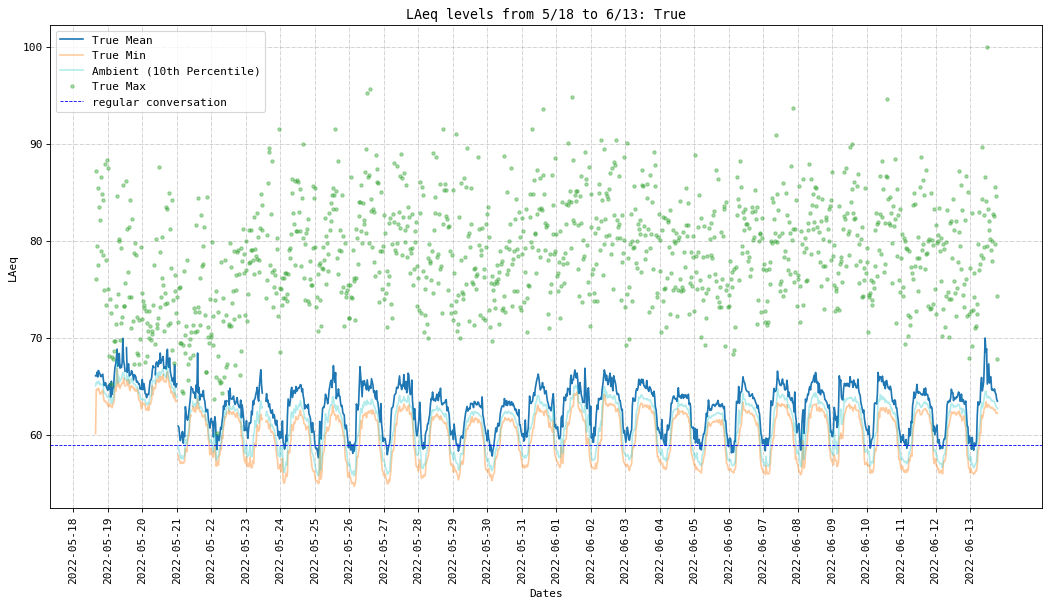

In [15]:
figure(figsize=(16, 8), dpi=80)
plt.plot(DTdays, DTmeans, label='True Mean')

plt.plot(DTdays, DTmins, label='True Min',alpha = 0.4)
plt.plot(DTdays, DTambient,'-', c='c',label = 'Ambient (10th Percentile)', alpha=0.3)
plt.plot(DTdays, DTmaxs, '.', label = 'True Max', alpha = .4)

# plt.axhline(y=80, linewidth = 0.75,color='r', linestyle='--', label='alarm clock')
plt.axhline(y=59, linewidth = 0.75,color='b', linestyle='--', label='regular conversation')

plt.xticks(np.unique(DTdays.date))  # Set text labels.
plt.xlabel('Dates')
plt.ylabel('LAeq')
plt.xticks(rotation = 90)
plt.title('LAeq levels from 5/18 to 6/13: True')
plt.legend(loc = 'upper left')
plt.grid(ls='-.', lw=0.5)
plt.show()

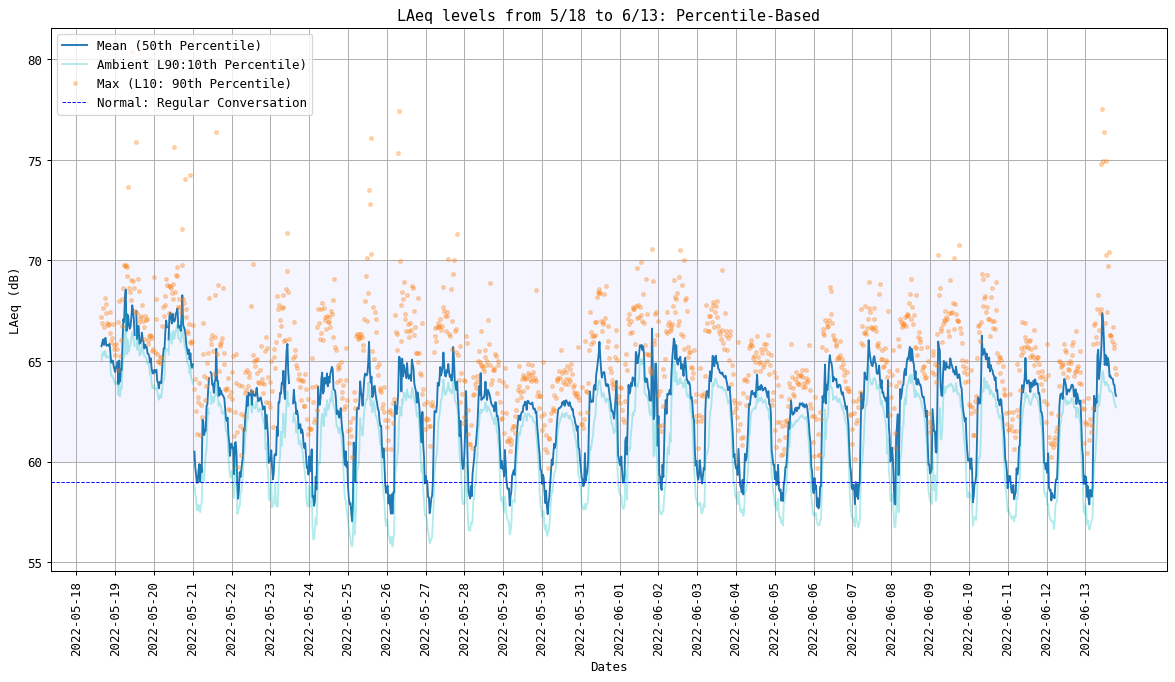

In [16]:
figure(figsize=(16, 8), dpi=90)


plt.plot(DTdays, DTfiftyEQ, label='Mean (50th Percentile)')
# plt.plot(DTdays, DTminsEQ, label='Min: (1st Percentile)',alpha = 0.4)
plt.plot(DTdays, DTambient,'-', c='c',label = 'Ambient L90:10th Percentile)', alpha=0.3)
plt.plot(DTdays, DTmaxsEQ,'.',label = 'Max (L10: 90th Percentile)', alpha=0.3)
# plt.axhline(y=80, linewidth = 0.75,color='r', linestyle='--', label='alarm clock')
plt.axhline(y=59, linewidth = 0.75,color='b', linestyle='--', label='Normal: Regular Conversation')
plt.axhspan(60, 70,color='b',alpha=0.04)

# plt.plot(DTdays, DTmedians)
plt.xticks(np.unique(DTdays.date))  # Set text labels.
plt.xlabel('Dates')
plt.ylabel('LAeq (dB)')
plt.xticks(rotation = 90)
plt.title('LAeq levels from 5/18 to 6/13: Percentile-Based')
plt.legend(loc = 'upper left')
plt.grid(True)
plt.show()

#### Time Series: Day of Week

In [17]:
# DTdays, DTmeans, DTmins, DTmaxs, DTstds, DTmedians, DTambient, DTminsEQ, DTmaxsEQ, DTfiftyEQ, TSxDT = getBasicStat(pd.Grouper(key='datetime', freq='30min'))
TSxDoW_all = getBasicStat(pd.Grouper(key='datetime', freq='30min'))
TSxDoW = TSxDoW_all[-1]
print(TSxDoW)

                          laeq                                 ambientEQ  \
                          mean    min    max       std  median             
datetime                                                                   
2022-05-18 15:30:00  66.081280  60.14  87.18  1.832391  65.735    65.060   
2022-05-18 16:00:00  66.085828  64.67  76.03  0.885272  65.920    65.370   
2022-05-18 16:30:00  66.445950  64.71  79.45  1.414080  66.080    65.440   
2022-05-18 17:00:00  65.962994  64.60  77.46  0.941412  65.800    65.260   
2022-05-18 17:30:00  66.636889  64.79  85.48  1.971556  66.080    65.500   
...                        ...    ...    ...       ...     ...       ...   
2022-06-13 17:00:00  64.728066  62.62  79.67  2.020666  64.110    63.420   
2022-06-13 17:30:00  64.330544  62.57  85.57  1.850873  63.840    63.150   
2022-06-13 18:00:00  64.221661  62.28  84.56  1.708816  63.800    62.940   
2022-06-13 18:30:00  63.666956  62.20  74.28  1.081664  63.430    62.810   
2022-06-13 1

In [18]:
print(TSxDoW.iloc[2]) 
      #== datetime.time(15, 30))
print(TSxDoW.index.time)

laeq       mean      66.44595
           min       64.71000
           max       79.45000
           std        1.41408
           median    66.08000
ambientEQ            65.44000
fiftyEQ              66.08000
minsEQ               65.07990
maxsEQ               67.62000
Name: 2022-05-18 16:30:00, dtype: float64
[datetime.time(15, 30) datetime.time(16, 0) datetime.time(16, 30) ...
 datetime.time(18, 0) datetime.time(18, 30) datetime.time(19, 0)]


In [19]:
def groupWeek(data, showData = False):
    weeks = {}
    wk = pd.DataFrame(columns = data.columns)
    dates = data.index
    c = 0
#     print(type(wk), type(data))

    for d in dates:
        if (d.dayofweek == 6 and d.time() == dates.time.max()):
            c+=1
#             wk.loc[data.index[c]]=data.loc[data.index[c]]
            wk.loc[d]=data.loc[d]
#             print(f'week is {wk}')
            weeks[c] = wk
#             weeks.append(wk)
#             print(f'-----------WEEKS IS NOW {weeks}')
#             print(c)
#             print(weeks['c'])
            wk = pd.DataFrame(columns = data.columns)
#             print(wk)
        else:
#             wk.append(data.loc[d])
#             print(type(wk), wk)
            wk.loc[d]=data.loc[d]
#         print(d.dayofweek)
    if showData == True:
        for key in weeks:
            print("\n" +"="*40)
            print(key)
            print("-"*40)
            print(weeks[key])
    return weeks;

# for d in DateDW.index:
#     print(type(d))
# print(type(DateDW.index[0]))
# print()

In [20]:
groupWeek(TSxDoW)

{1:                           laeq                                 ambientEQ  \
                           mean    min    max       std  median             
 2022-05-18 15:30:00  66.081280  60.14  87.18  1.832391  65.735    65.060   
 2022-05-18 16:00:00  66.085828  64.67  76.03  0.885272  65.920    65.370   
 2022-05-18 16:30:00  66.445950  64.71  79.45  1.414080  66.080    65.440   
 2022-05-18 17:00:00  65.962994  64.60  77.46  0.941412  65.800    65.260   
 2022-05-18 17:30:00  66.636889  64.79  85.48  1.971556  66.080    65.500   
 ...                        ...    ...    ...       ...     ...       ...   
 2022-05-22 21:30:00  63.090202  59.66  77.86  2.473211  62.330    60.930   
 2022-05-22 22:00:00  62.485377  58.73  81.16  2.764649  61.870    59.775   
 2022-05-22 22:30:00  61.710389  58.08  78.64  2.403682  61.210    59.597   
 2022-05-22 23:00:00  60.431300  57.37  76.72  2.555764  59.935    58.248   
 2022-05-22 23:30:00  60.597643  57.21  72.37  2.309723  60.060    58.079

In [21]:
daysofweekDict = {0:'Monday', 1: 'Tuesday', 2: 'Wednesday', 3: 'Thursday', 
                  4: 'Friday', 5: 'Saturday', 6: 'Sunday'}


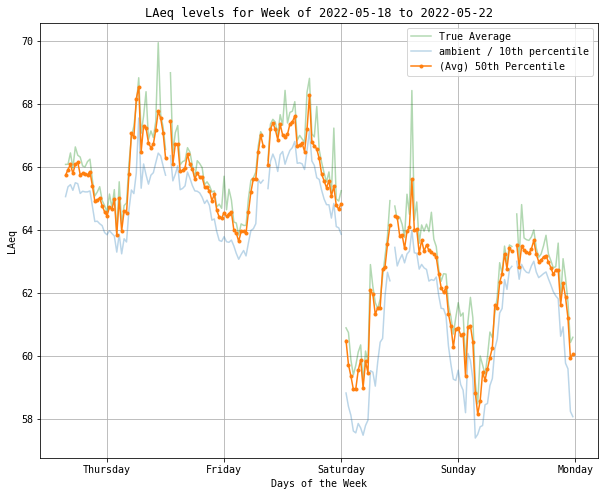

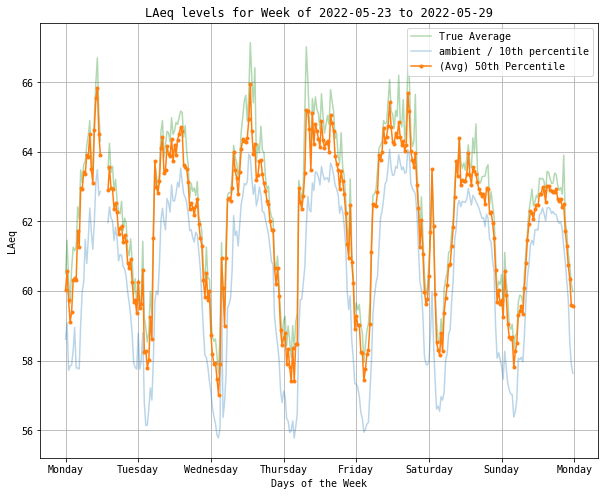

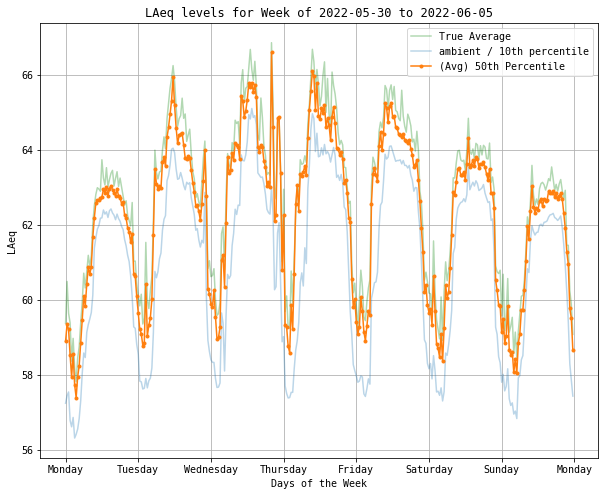

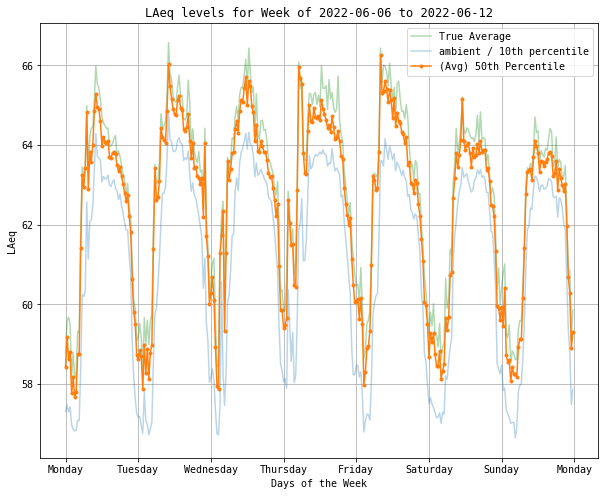

In [22]:
weekInfo = groupWeek(TSxDoW)

for week in weekInfo:
#     print(week)
    DWlabels = weekInfo[week].index
    DWlabels_DW = [daysofweekDict.get(i) for i in np.unique(weekInfo[week].index.dayofweek)]
    DWambient = weekInfo[week].ambientEQ
    DW50 = weekInfo[week].fiftyEQ
    DW90 = weekInfo[week].maxsEQ

    DWmeans = weekInfo[week].laeq['mean']

    fig, ax = plt.subplots(figsize=(10, 8))
    ax.plot(DWlabels, DWmeans,'-', c = 'g', alpha=0.3, label='True Average')
#     plt.plot(DWlabels, DWmins, '.-', c = 'm')
#     plt.plot(DWlabels, DWmaxs, '.-', c = 'b')
    ax.plot(DWlabels, DWambient, '-', alpha = 0.3, label = 'ambient / 10th percentile')
    ax.plot(DWlabels, DW50,'.-', label = '(Avg) 50th Percentile')
#     ax.plot(DWlabels, DW90,'.', alpha = 0.2, label = '(Max) 90th Percentile')

    
    ax.set_xlabel('Days of the Week')
    ax.set_ylabel('LAeq')
    ax.xaxis.set_major_locator(mdates.DayLocator(interval=1))   
    ax.xaxis.set_major_formatter(mdates.DateFormatter('%A')) 

    # plt.yticks(np.linspace(round(min(mins)-1), np.ceil(max(maxs)),10, dtype=int))
    # plt.xticks(rotation = 90)
    plt.title(f'LAeq levels for Week of {DWlabels[0].date()} to {DWlabels[-1].date()}')
    plt.legend()
    ax.grid(True)
    plt.show()


## -------------------------

#### Heat Map: Average Hourly LAeq Levels per Day of Week

In [23]:
import seaborn as sns

In [24]:
HMxHR_all = getBasicStat(pd.Grouper(key='datetime', freq='1H'))
HMxHR = HMxHR_all[-1]
HMxHR['dayofweek'] = HMxHR.index.dayofweek
HMxHR['hour'] = HMxHR.index.hour
print(HMxHR)

                          laeq                                 ambientEQ  \
                          mean    min    max       std  median             
datetime                                                                   
2022-05-18 15:00:00  66.081280  60.14  87.18  1.832391  65.735    65.060   
2022-05-18 16:00:00  66.265889  64.67  79.45  1.193192  65.990    65.400   
2022-05-18 17:00:00  66.299942  64.60  85.48  1.580995  65.920    65.370   
2022-05-18 18:00:00  66.343444  64.19  83.52  1.602143  65.970    65.270   
2022-05-18 19:00:00  66.017406  64.22  86.57  1.162476  65.790    65.220   
...                        ...    ...    ...       ...     ...       ...   
2022-06-13 15:00:00  64.679119  62.78  80.00  1.565240  64.250    63.500   
2022-06-13 16:00:00  64.568303  62.55  82.80  1.516403  64.135    63.450   
2022-06-13 17:00:00  64.529194  62.57  85.57  1.947486  63.990    63.270   
2022-06-13 18:00:00  63.944308  62.20  84.56  1.456503  63.590    62.870   
2022-06-13 1

In [25]:
HMxHRxWK = groupWeek(HMxHR)
print(HMxHRxWK)

{1:                           laeq                                 ambientEQ  \
                          mean    min    max       std  median             
2022-05-18 15:00:00  66.081280  60.14  87.18  1.832391  65.735    65.060   
2022-05-18 16:00:00  66.265889  64.67  79.45  1.193192  65.990    65.400   
2022-05-18 17:00:00  66.299942  64.60  85.48  1.580995  65.920    65.370   
2022-05-18 18:00:00  66.343444  64.19  83.52  1.602143  65.970    65.270   
2022-05-18 19:00:00  66.017406  64.22  86.57  1.162476  65.790    65.220   
...                        ...    ...    ...       ...     ...       ...   
2022-05-22 19:00:00  62.920560  61.42  76.55  1.194016  62.710    62.150   
2022-05-22 20:00:00  63.274075  61.26  79.28  1.969296  62.740    61.860   
2022-05-22 21:00:00  62.615965  59.66  77.86  2.174974  61.975    60.805   
2022-05-22 22:00:00  62.172133  58.08  81.16  2.651241  61.490    59.700   
2022-05-22 23:00:00  60.499794  57.21  76.72  2.457639  60.000    58.198   

       

In [26]:
def plotHeatMap(datadict, column, index, values, labelDoW=False):
    for wk in datadict:
        wkData = datadict[wk]
        dateLabels = np.unique(wkData.index.date)


        df3 = wkData.reset_index().pivot(columns=column,index = index,values=values)

        fig, ax = plt.subplots(figsize=(5, 7))
        hm = sns.heatmap(df3, vmin = 55, vmax = 70, linewidths=.5,cmap='OrRd');
        hm.set_xticklabels([daysofweekDict.get(i) for i in df3.columns])

#         hm.xaxis.set_major_locator(mdates.DayLocator(interval=1))   
#         hm.xaxis.set_major_formatter(mdates.DateFormatter('%A')) 
        if labelDoW == True:
            hm.set_yticks(np.arange(len(timeofdayDict.values())))
            hm.set_yticklabels(timeofdayDict.values(), rotation=0)
        plt.setp(hm.get_xticklabels(), rotation=45, horizontalalignment='right')

        plt.xlabel('Day of Week', weight='bold')
        plt.ylabel('Hour', weight='bold')
        plt.title(f'Heat Map of LAeq 50th Percentile Levels Week of {dateLabels[0]} to {dateLabels[-1]}', weight='bold')

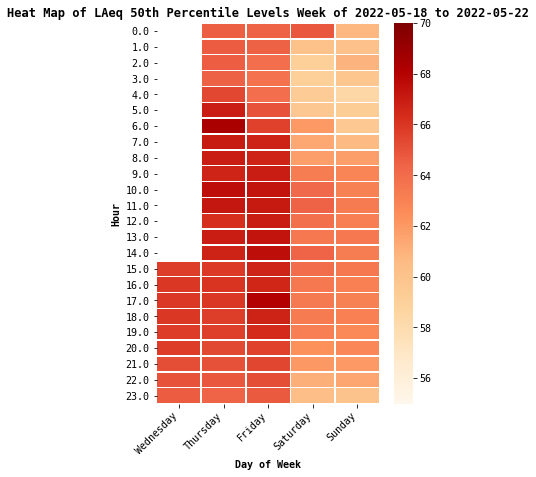

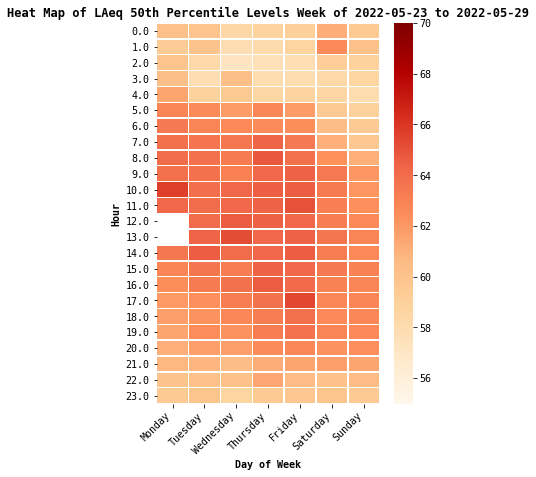

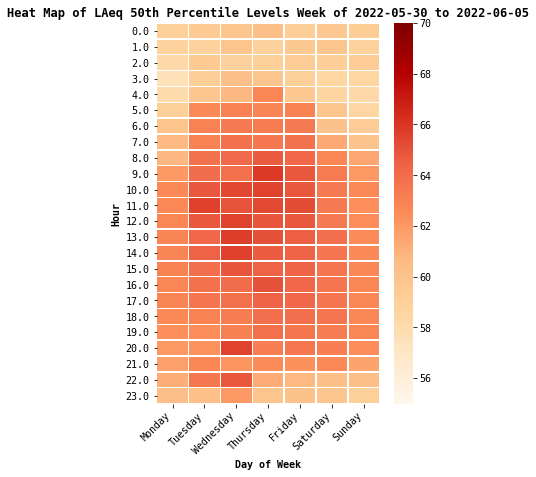

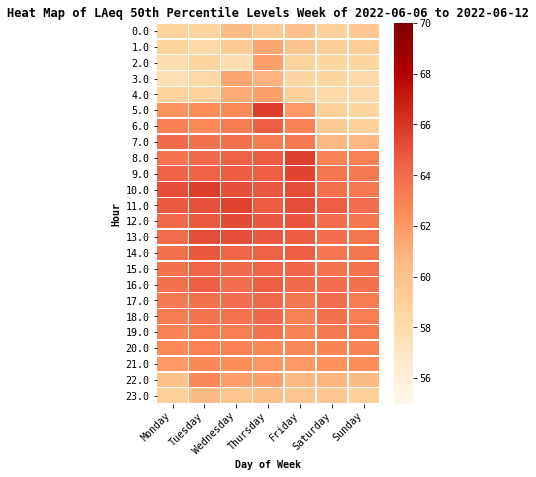

In [27]:
plotHeatMap(HMxHRxWK, 'dayofweek', 'hour', 'fiftyEQ')

#### Heat Map: LAeq Levels by Time of Day per Day of Week

In [28]:
HMxTD_all = getBasicStat(pd.Grouper(key='datetime', freq='6H'))
HMxTD = HMxTD_all[-1]
HMxTD['dayofweek'] = HMxTD.index.dayofweek
HMxTD['hour'] = HMxTD.index.hour
print(HMxTD)


timeofdayDict = {0: 'Early Morning (12am-6am)', 
                 6: 'Morning (6am-12pm)', 
                 12: 'Afternoon (12pm-6pm)', 
                 18: 'Night (6pm-12am)'}

                          laeq                                 ambientEQ  \
                          mean    min    max       std  median             
datetime                                                                   
2022-05-18 12:00:00  66.245063  60.14  87.18  1.493172  65.920    65.310   
2022-05-18 18:00:00  65.675443  63.28  88.32  1.466865  65.480    64.440   
2022-05-19 00:00:00  65.065275  62.79  87.52  1.739101  64.680    63.870   
2022-05-19 06:00:00  67.848275  64.77  85.75  2.747938  67.210    65.870   
2022-05-19 12:00:00  66.829829  64.55  86.13  2.035831  66.265    65.550   
...                        ...    ...    ...       ...     ...       ...   
2022-06-12 18:00:00  62.304280  56.57  86.66  2.402014  62.650    59.069   
2022-06-13 00:00:00  59.696810  55.93  82.86  2.768274  58.920    57.050   
2022-06-13 06:00:00  65.914120  58.52  99.95  3.986276  64.970    62.090   
2022-06-13 12:00:00  65.310339  62.55  85.57  2.458062  64.510    63.540   
2022-06-13 1

In [29]:
HMxTD['timeofday'] = [timeofdayDict.get(i) for i in HMxTD.index.hour]
print(HMxTD)

                          laeq                                 ambientEQ  \
                          mean    min    max       std  median             
datetime                                                                   
2022-05-18 12:00:00  66.245063  60.14  87.18  1.493172  65.920    65.310   
2022-05-18 18:00:00  65.675443  63.28  88.32  1.466865  65.480    64.440   
2022-05-19 00:00:00  65.065275  62.79  87.52  1.739101  64.680    63.870   
2022-05-19 06:00:00  67.848275  64.77  85.75  2.747938  67.210    65.870   
2022-05-19 12:00:00  66.829829  64.55  86.13  2.035831  66.265    65.550   
...                        ...    ...    ...       ...     ...       ...   
2022-06-12 18:00:00  62.304280  56.57  86.66  2.402014  62.650    59.069   
2022-06-13 00:00:00  59.696810  55.93  82.86  2.768274  58.920    57.050   
2022-06-13 06:00:00  65.914120  58.52  99.95  3.986276  64.970    62.090   
2022-06-13 12:00:00  65.310339  62.55  85.57  2.458062  64.510    63.540   
2022-06-13 1

In [30]:
HMxTDxWK = groupWeek(HMxTD)
print(HMxTDxWK)

{1:                           laeq                                 ambientEQ  \
                          mean    min    max       std  median             
2022-05-18 12:00:00  66.245063  60.14  87.18  1.493172  65.920    65.310   
2022-05-18 18:00:00  65.675443  63.28  88.32  1.466865  65.480    64.440   
2022-05-19 00:00:00  65.065275  62.79  87.52  1.739101  64.680    63.870   
2022-05-19 06:00:00  67.848275  64.77  85.75  2.747938  67.210    65.870   
2022-05-19 12:00:00  66.829829  64.55  86.13  2.035831  66.265    65.550   
2022-05-19 18:00:00  65.428847  62.67  79.78  1.382806  65.290    64.160   
2022-05-20 00:00:00  64.750783  62.51  74.63  1.594318  64.270    63.410   
2022-05-20 06:00:00  66.893640  63.30  87.57  1.548432  66.830    65.160   
2022-05-20 12:00:00  67.622053  65.42  83.44  1.836687  67.110    66.250   
2022-05-20 18:00:00  66.064405  63.41  84.89  1.911283  65.715    64.520   
2022-05-21 00:00:00  60.266738  57.05  76.89  2.533998  59.630    57.900   
2022-05-

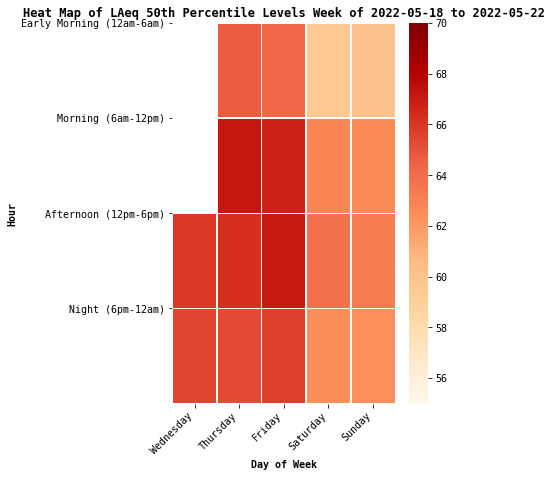

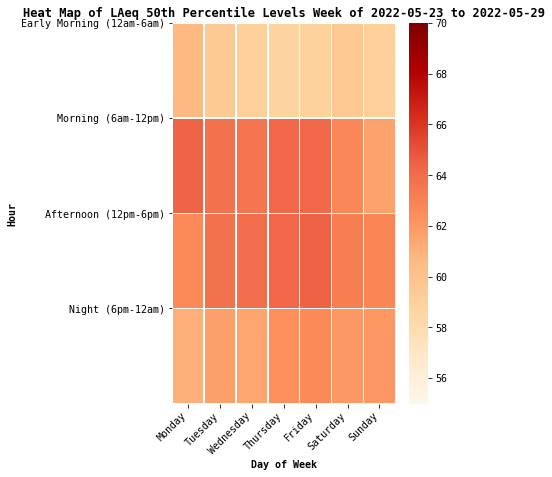

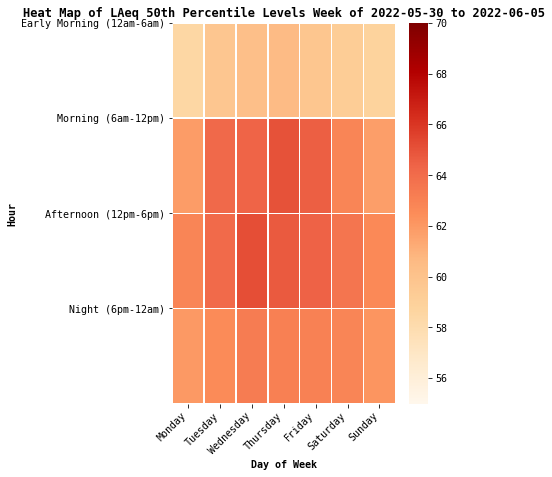

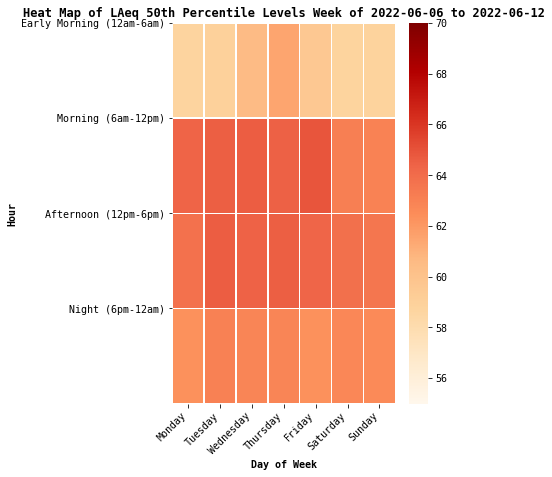

In [31]:
plotHeatMap(HMxTDxWK, 'dayofweek','hour', 'fiftyEQ',labelDoW = True)


==========================================================

#### Heatmap of Aggregate Data sorted by Time of Day

/Users/anniechu/opt/anaconda3/lib/python3.8/site-packages/pandas/core/generic.py:4153: PerformanceWarning: dropping on a non-lexsorted multi-index without a level parameter may impact performance.
  obj = obj._drop_axis(labels, axis, level=level, errors=errors)


Text(0.5, 0.98, 'Heat Map of LAeq 50th Percentile Levels Week of 2022-05-18 to 2022-06-13')

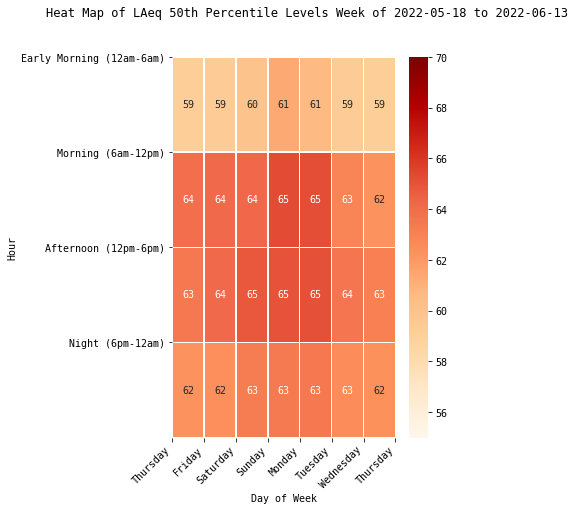

In [32]:
# print(HMxTD)
df69 = HMxTD.reset_index().pivot_table(columns = 'dayofweek',index = 'hour', values='fiftyEQ')
dateLabels = np.unique(HMxTD.index.date)

# print(df69)
fig, ax = plt.subplots(figsize=(5, 7))
hm = sns.heatmap(df69, annot = True,vmin = 55, vmax = 70, linewidths=.5,cmap='OrRd');

hm.xaxis.set_major_locator(mdates.DayLocator(interval=1))   
hm.xaxis.set_major_formatter(mdates.DateFormatter('%A')) 
hm.set_yticks(np.arange(len(timeofdayDict.values())))
hm.set_yticklabels(timeofdayDict.values(), rotation=0)
plt.setp(hm.get_xticklabels(), rotation=45, horizontalalignment='right')


plt.xlabel('Day of Week')
plt.ylabel('Hour')
plt.suptitle(f'Heat Map of LAeq 50th Percentile Levels Week of {dateLabels[0]} to {dateLabels[-1]}')

#### Heatmap of Aggregate Data sorted by Hour

                          laeq                                 ambientEQ  \
                          mean    min    max       std  median             
datetime                                                                   
2022-05-18 15:00:00  66.081280  60.14  87.18  1.832391  65.735    65.060   
2022-05-18 16:00:00  66.265889  64.67  79.45  1.193192  65.990    65.400   
2022-05-18 17:00:00  66.299942  64.60  85.48  1.580995  65.920    65.370   
2022-05-18 18:00:00  66.343444  64.19  83.52  1.602143  65.970    65.270   
2022-05-18 19:00:00  66.017406  64.22  86.57  1.162476  65.790    65.220   
...                        ...    ...    ...       ...     ...       ...   
2022-06-13 15:00:00  64.679119  62.78  80.00  1.565240  64.250    63.500   
2022-06-13 16:00:00  64.568303  62.55  82.80  1.516403  64.135    63.450   
2022-06-13 17:00:00  64.529194  62.57  85.57  1.947486  63.990    63.270   
2022-06-13 18:00:00  63.944308  62.20  84.56  1.456503  63.590    62.870   
2022-06-13 1

/Users/anniechu/opt/anaconda3/lib/python3.8/site-packages/pandas/core/generic.py:4153: PerformanceWarning: dropping on a non-lexsorted multi-index without a level parameter may impact performance.
  obj = obj._drop_axis(labels, axis, level=level, errors=errors)


Text(0.5, 1.0, 'Heat Map of LAeq 50th Percentile Levels Week of 2022-05-18 to 2022-06-13')

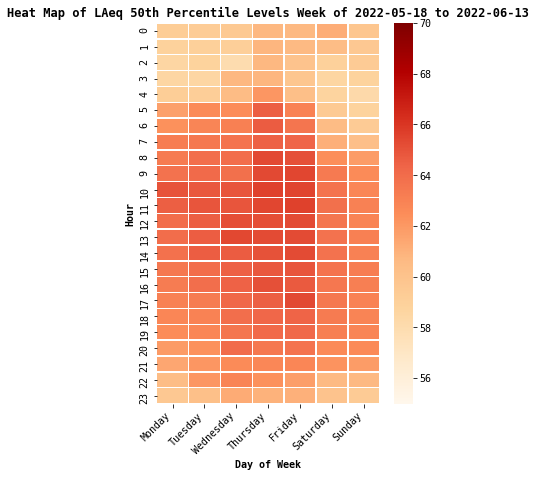

In [34]:
wkData = HMxHR.copy()
print(wkData)
dateLabels = np.unique(wkData.index.date)

df3 = wkData.reset_index().pivot_table(columns='dayofweek',index = 'hour',values='fiftyEQ')

fig, ax = plt.subplots(figsize=(5, 7))
hm = sns.heatmap(df3, vmin = 55, vmax = 70, linewidths=.5,cmap='OrRd');

res = [lis[1] for lis in df3.columns]
hm.set_xticklabels([daysofweekDict.get(i) for i in res])

plt.setp(hm.get_xticklabels(), rotation=45, horizontalalignment='right')

plt.xlabel('Day of Week', weight='bold')
plt.ylabel('Hour', weight='bold')
plt.title(f'Heat Map of LAeq 50th Percentile Levels Week of {dateLabels[0]} to {dateLabels[-1]}', weight='bold')

#### Ridgeline Plots

In [196]:
# ridgeDY = wkData.copy()
# print(ridgeDY)

RGExMIN_all = getBasicStat(pd.Grouper(key='datetime', freq='30min'))
RGExMIN = RGExMIN_all[-1]
RGExMIN['dayofweek'] = RGExMIN.index.dayofweek
print(RGExMIN)

                          laeq                                 ambientEQ  \
                          mean    min    max       std  median             
datetime                                                                   
2022-05-18 15:30:00  66.081280  60.14  87.18  1.832391  65.735    65.060   
2022-05-18 16:00:00  66.085828  64.67  76.03  0.885272  65.920    65.370   
2022-05-18 16:30:00  66.445950  64.71  79.45  1.414080  66.080    65.440   
2022-05-18 17:00:00  65.962994  64.60  77.46  0.941412  65.800    65.260   
2022-05-18 17:30:00  66.636889  64.79  85.48  1.971556  66.080    65.500   
...                        ...    ...    ...       ...     ...       ...   
2022-06-13 17:00:00  64.728066  62.62  79.67  2.020666  64.110    63.420   
2022-06-13 17:30:00  64.330544  62.57  85.57  1.850873  63.840    63.150   
2022-06-13 18:00:00  64.221661  62.28  84.56  1.708816  63.800    62.940   
2022-06-13 18:30:00  63.666956  62.20  74.28  1.081664  63.430    62.810   
2022-06-13 1

In [197]:
daymean = RGExMIN.groupby('dayofweek')['fiftyEQ'].mean()
RGExMIN['mean_Day'] = RGExMIN['dayofweek'].map(daymean)

In [198]:
print(RGExMIN)

                          laeq                                 ambientEQ  \
                          mean    min    max       std  median             
datetime                                                                   
2022-05-18 15:30:00  66.081280  60.14  87.18  1.832391  65.735    65.060   
2022-05-18 16:00:00  66.085828  64.67  76.03  0.885272  65.920    65.370   
2022-05-18 16:30:00  66.445950  64.71  79.45  1.414080  66.080    65.440   
2022-05-18 17:00:00  65.962994  64.60  77.46  0.941412  65.800    65.260   
2022-05-18 17:30:00  66.636889  64.79  85.48  1.971556  66.080    65.500   
...                        ...    ...    ...       ...     ...       ...   
2022-06-13 17:00:00  64.728066  62.62  79.67  2.020666  64.110    63.420   
2022-06-13 17:30:00  64.330544  62.57  85.57  1.850873  63.840    63.150   
2022-06-13 18:00:00  64.221661  62.28  84.56  1.708816  63.800    62.940   
2022-06-13 18:30:00  63.666956  62.20  74.28  1.081664  63.430    62.810   
2022-06-13 1

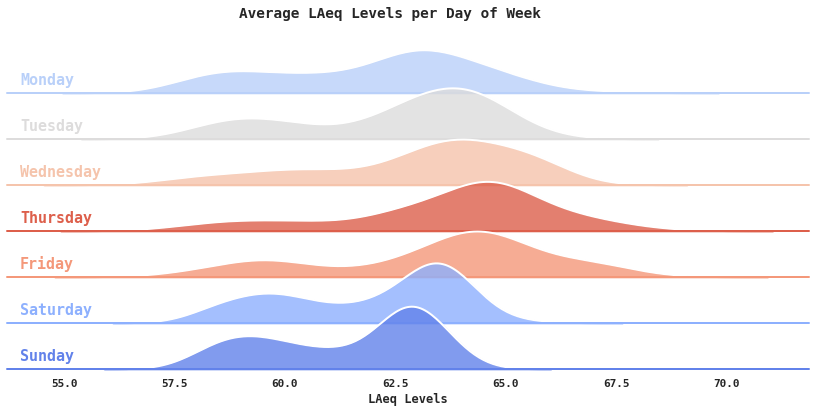

In [199]:
# sns.set_theme(style="white", rc_context={"axes.facecolor": (0, 0, 0, 0)})

pal = sns.color_palette(palette='coolwarm', n_colors=7)
g = sns.FacetGrid(RGExMIN, row='dayofweek', hue='mean_Day', aspect=15, height=0.8, palette=pal);

#PLOTTING VALUES
g.map(sns.kdeplot, 'fiftyEQ',
      bw_adjust=1, clip_on=False,
      fill=True, alpha=0.8, linewidth=1)
g.map(sns.kdeplot, 'fiftyEQ', 
      bw_adjust=1, clip_on=False, 
      color="w", lw=2)

#adding bottom line
g.map(plt.axhline, y=0,
      lw=2, clip_on=False)

#adding days of week to plot
for i, ax in enumerate(g.axes.flat):
    ax.text(54, 0.04, daysofweekDict[i],
            fontweight='bold', fontsize=15,
            color=ax.lines[-1].get_color())

#changing height space between subplots
g.fig.subplots_adjust(hspace=-0.3)
    
g.set_titles("")
g.set(yticks=[])
g.despine(bottom=True, left=True)

# g.axes.refline(x=60)
# axes = g.axes.flatten()
# for i, ax in enumerate(axes):
#     ax.axvline(60, ymax=0.7,ls='--', c='orange')
#     ax.axvline(70, ymax=0.7,ls='-', c='red')


plt.setp(ax.get_xticklabels(), fontweight='bold')
plt.xlabel('LAeq Levels', fontweight='bold')
g.fig.suptitle('Average LAeq Levels per Day of Week',
               fontweight='bold',
               ha='center')
plt.show()

In [ ]:
ridgeDY_split = ridgeDY.copy()

In [151]:
DAYridgeDY = ridgeDY_split.between_time('06:00','18:00', include_start=True, include_end=False)
NIGHTridgeDY = ridgeDY_split.between_time('18:00','06:00',include_start=True, include_end=False)

In [152]:
DAYdaymean = DAYridgeDY.groupby('dayofweek')['fiftyEQ'].mean()
DAYridgeDY['mean_Day'] = DAYridgeDY['dayofweek'].map(DAYdaymean)

NIGHTdaymean = NIGHTridgeDY.groupby('dayofweek')['fiftyEQ'].mean()
NIGHTridgeDY['mean_Day'] = NIGHTridgeDY['dayofweek'].map(NIGHTdaymean)

<ipython-input-152-ffabbd8f6c80>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  DAYridgeDY['mean_Day'] = DAYridgeDY['dayofweek'].map(DAYdaymean)
<ipython-input-152-ffabbd8f6c80>:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  NIGHTridgeDY['mean_Day'] = NIGHTridgeDY['dayofweek'].map(NIGHTdaymean)


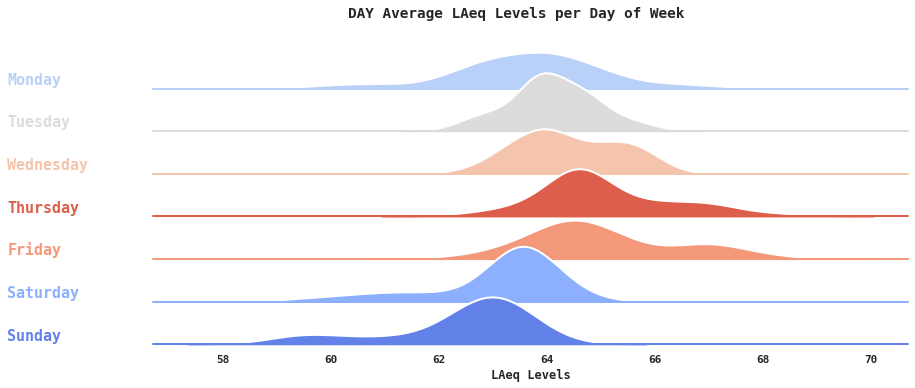

In [163]:
pal = sns.color_palette(palette='coolwarm', n_colors=7)
g = sns.FacetGrid(DAYridgeDY, row='dayofweek', hue='mean_Day', aspect=15, height=0.75, palette=pal);

#PLOTTING VALUES
g.map(sns.kdeplot, 'fiftyEQ',
      bw_adjust=1, clip_on=False,
      fill=True, alpha=1, linewidth=1)
g.map(sns.kdeplot, 'fiftyEQ', 
      bw_adjust=1, clip_on=False, 
      color="w", lw=2)

#adding bottom line
g.map(plt.axhline, y=0,
      lw=2, clip_on=False)

#adding days of week to plot
for i, ax in enumerate(g.axes.flat):
    ax.text(54, 0.04, daysofweekDict[i],
            fontweight='bold', fontsize=15,
            color=ax.lines[-1].get_color())

#changing height space between subplots
g.fig.subplots_adjust(hspace=-0.3)
    
g.set_titles("")
g.set(yticks=[])
g.despine(bottom=True, left=True)

plt.setp(ax.get_xticklabels(), fontweight='bold')
plt.xlabel('LAeq Levels', fontweight='bold')
g.fig.suptitle('DAY Average LAeq Levels per Day of Week',
               fontweight='bold',
               ha='center')
plt.show()

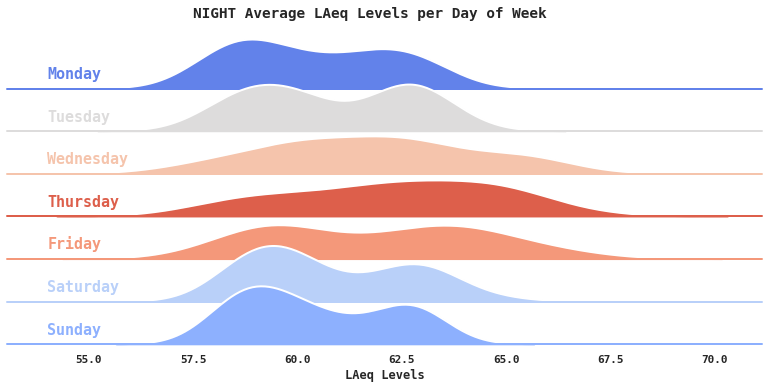

In [162]:

pal = sns.color_palette(palette='coolwarm', n_colors=7)
g = sns.FacetGrid(NIGHTridgeDY, row='dayofweek', hue='mean_Day', aspect=15, height=0.75, palette=pal);

#PLOTTING VALUES
g.map(sns.kdeplot, 'fiftyEQ',
      bw_adjust=1, clip_on=False,
      fill=True, alpha=1, linewidth=1)
g.map(sns.kdeplot, 'fiftyEQ', 
      bw_adjust=1, clip_on=False, 
      color="w", lw=2)

#adding bottom line
g.map(plt.axhline, y=0,
      lw=2, clip_on=False)

#adding days of week to plot
for i, ax in enumerate(g.axes.flat):
    ax.text(54, 0.04, daysofweekDict[i],
            fontweight='bold', fontsize=15,
            color=ax.lines[-1].get_color())

#changing height space between subplots
g.fig.subplots_adjust(hspace=-0.3)
    
g.set_titles("")
g.set(yticks=[])
g.despine(bottom=True, left=True)

plt.setp(ax.get_xticklabels(), fontweight='bold')
plt.xlabel('LAeq Levels', fontweight='bold')
g.fig.suptitle('NIGHT Average LAeq Levels per Day of Week',
               fontweight='bold',
               ha='center')
plt.show()

#### Box Plots?

In [147]:
BPxMIN_all = getBasicStat(pd.Grouper(key='datetime', freq='1min'))
BPxMIN = BPxMIN_all[-1]
BPxMIN['dayofweek'] = BPxMIN.index.dayofweek
BPxMIN['date'] = BPxMIN.index.date

print(BPxMIN)

                          laeq                                 ambientEQ  \
                          mean    min    max       std  median             
datetime                                                                   
2022-05-18 15:32:00  66.099091  60.14  87.18  6.016470  65.355    60.509   
2022-05-18 15:33:00  65.966333  64.98  72.27  1.086592  65.730    65.198   
2022-05-18 15:34:00  66.005500  64.88  76.29  1.550497  65.650    65.099   
2022-05-18 15:35:00  65.437667  64.44  66.50  0.375731  65.360    64.989   
2022-05-18 15:36:00  65.522500  64.67  66.89  0.494038  65.475    64.923   
...                        ...    ...    ...       ...     ...       ...   
2022-06-13 18:57:00  63.218833  62.30  66.92  0.777922  63.110    62.499   
2022-06-13 18:58:00  63.468136  62.35  69.81  1.059282  63.250    62.590   
2022-06-13 18:59:00  62.991803  62.26  64.81  0.463442  62.920    62.430   
2022-06-13 19:00:00  63.196833  62.25  65.06  0.557590  63.085    62.648   
2022-06-13 1

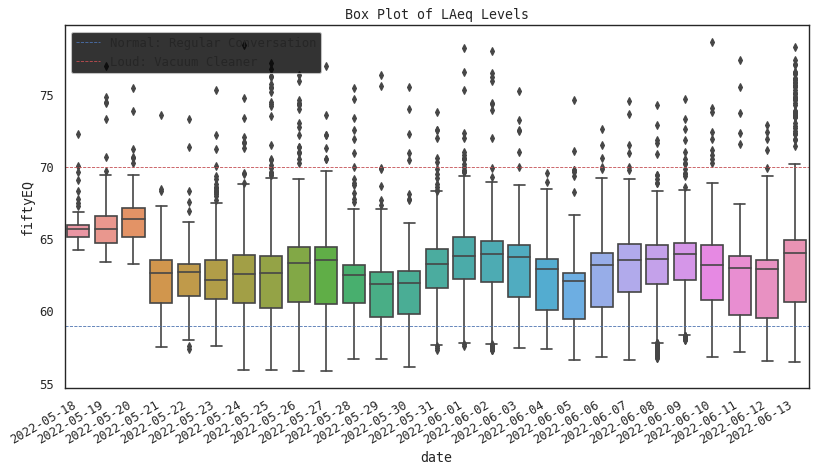

In [148]:
# boxplot = DateDW.boxplot(by='dayofweek', column = ['ambient'])
figure(figsize=(12, 6), dpi=80)

ax = sns.boxplot(x=BPxMIN['date'], y=BPxMIN['fiftyEQ'], showfliers=True)
# ax = sns.boxplot(x=BPxMIN['date'], y=BPxMIN.laeq['mean'], showfliers=True)
ax.set_xticklabels(ax.get_xticklabels(),rotation=30, horizontalalignment='right');
plt.axhline(y=59, linewidth = 0.75,color='b', linestyle='--', label='Normal: Regular Conversation')
plt.axhline(y=70, linewidth = 0.75,color='r', linestyle='--', label='Loud: Vacuum Cleaner')

plt.legend()
plt.title('Box Plot of LAeq Levels');

### Splitting into Day/Night

In [ ]:

# print(dfREUP)
dfREUP = BPxMIN.copy()
day = dfREUP.between_time('06:00','18:00', include_start=True, include_end=False)
night = dfREUP.between_time('18:00','06:00',include_start=True, include_end=False)

print(day)
print(night)
# print(len(dfREUP), len(day)+len(night))



In [ ]:
figure(figsize=(16, 12), dpi=80)
plt.subplot(211)
axDay = sns.boxplot(x=day['date'], y=day['fiftyEQ'], showfliers=True)
# ax = sns.boxplot(x=BPxMIN['date'], y=BPxMIN.laeq['mean'], showfliers=True)
axDay.set_xticklabels(axDay.get_xticklabels(),rotation=30, horizontalalignment='right');
plt.axhline(y=59, linewidth = 0.75,color='b', linestyle='--', label='Normal: Regular Conversation')
plt.axhline(y=70, linewidth = 0.75,color='r', linestyle='--', label='Loud: Vacuum Cleaner')
plt.ylim(55, 80)

plt.legend()
plt.title('Box Plot of LAeq Levels: DAY');


figure(figsize=(16, 12), dpi=80)
plt.subplot(212)
axNight = sns.boxplot(x=night['date'], y=night['fiftyEQ'], showfliers=True)
# ax = sns.boxplot(x=BPxMIN['date'], y=BPxMIN.laeq['mean'], showfliers=True)
axNight.set_xticklabels(axNight.get_xticklabels(),rotation=30, horizontalalignment='right');
plt.axhline(y=59, linewidth = 0.75,color='b', linestyle='--', label='Normal: Regular Conversation')
plt.axhline(y=70, linewidth = 0.75,color='r', linestyle='--', label='Loud: Vacuum Cleaner')
plt.ylim(55, 80)

plt.legend()
plt.title('Box Plot of LAeq Levels: Night');

In [ ]:
"""
sadly not working
"""

In [ ]:

dayTS = BPxMIN.between_time('06:00','18:00', include_start=True, include_end=False)
nightTS = BPxMIN.between_time('18:00','06:00',include_start=True, include_end=False)

In [ ]:
print(dayTS)
figure(figsize=(16, 12), dpi=80)

plt.subplot(211)
plt.plot(dayTS.index, dayTS['fiftyEQ'], label='day')
plt.plot(nightTS.index, nightTS['fiftyEQ'], label='night')
plt.legend()

In [ ]:
DATEday12=dayTS.loc['20220520':'20220520']
DATEnight12=nightTS.loc['20220520':'20220520']

plt.plot(DATEday12.index, DATEday12['ambient'])
plt.plot(DATEnight12.index, DATEnight12['ambient'])

In [ ]:
day12hr = day

day12hr['time12'] = pd.to_datetime(day12hr.index).strftime('%I:%M')
print(day12hr['time12'][8:55])

night12hr = night
night12hr['time12'] = pd.to_datetime(night12hr.index).strftime('%I:%M')
print(night12hr['ambient'][580:627])



In [ ]:
figure(figsize=(16, 12), dpi=80)
fig, ax = plt.subplots(figsize=(16, 7))
ax.plot(day12hr['time12'][8:55], day12hr['fiftyEQ'][8:55], label='day')

# ax.plot(day12hr['time12'][149:198], day12hr['FiftyPercentile'][149:198])
ax.plot(night12hr['time12'][580:627], night12hr['fiftyEQ'][580:627], label='night')
# plt.plot(night12hr['time12'][149:198], day12hr['FiftyPercentile'][149:198])

# ax.plot(night12hr['time12'][149:198], day12hr['FiftyPercentile'][1:50])
plt.setp(ax.get_xticklabels(), rotation=45, horizontalalignment='right');
plt.legend()
plt.show()